<a href="https://colab.research.google.com/github/Isaacfer49/Danone-Hackathon-Data-Science-challenge/blob/main/danone_exploration_and_preeliminary_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Danone Data Science challenge
## By Isaac Fernández.

## Data exploration.

Libraries installation:

In [1]:
!pip install -q xgboost

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import mean_squared_error
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Data load:

In [3]:
data_train = pd.read_json('/content/train_products.json')

In [4]:
data_train = data_train.T

In [5]:
data_train.columns

Index(['name', 'brand', 'generic_name', 'categories_hierarchy', 'is_beverage',
       'selling_countries', 'ingredient_origins', 'ingredients',
       'additives_count', 'calcium_100g', 'carbohydrates_100g',
       'energy_kcal_100g', 'fat_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'sugars_100g', 'nutrition_grade',
       'packaging_materials',
       'non_recyclable_and_non_biodegradable_materials_count',
       'est_co2_agriculture', 'est_co2_consumption', 'est_co2_distribution',
       'est_co2_packaging', 'est_co2_processing', 'est_co2_transportation',
       'ecoscore_grade'],
      dtype='object')

In [62]:
data_train.head()

,categories_hierarchy,is_beverage,selling_countries,ingredient_origins,ingredients,additives_count,calcium_100g,carbohydrates_100g,energy_kcal_100g,fat_100g,...,nutrition_grade,packaging_materials,non_recyclable_and_non_biodegradable_materials_count,est_co2_agriculture,est_co2_consumption,est_co2_distribution,est_co2_packaging,est_co2_processing,est_co2_transportation,ecoscore_grade
0,"[en:frozen-foods, en:frozen-fried-potatoes, en...",0,[en:france],{'en:unknown': 100},"[{'id': 'en:potato', 'percent': 82, 'percent_e...",1,<NA>,21,<NA>,7.1,...,1,[en:plastic],1,1.405794,0.122097,0.151978,0.400866,0.1234,0.344651,2
1,"[en:snacks, en:desserts, en:sweet-snacks, en:f...",0,[en:france],{'en:unknown': 100},"[{'id': 'en:glucose-syrup', 'percent_estimate'...",10,<NA>,58,366,14,...,4,"[en:cardboard, en:plastic]",1,1.772009,0,0.019531,0.288156,5.215055,0.171567,3
2,"[en:plant-based-foods-and-beverages, en:plant-...",0,"[en:austria, en:france, en:germany, en:spain, ...",{'en:unknown': 100},"[{'id': 'en:whole-wheat-flour', 'percent': 37,...",3,0.635,73.8,423,10.3,...,3,"[en:paperboard, en:plastic]",1,2.2396,0,0.019531,0.281596,0.770511,0.252874,3
3,"[en:dairies, en:fermented-foods, en:fermented-...",0,[en:italy],{'en:unknown': 100},"[{'has_sub_ingredients': 'yes', 'id': 'en:chee...",2,<NA>,8.5,<NA>,19,...,4,[en:plastic],1,4.536405,0.006688,0.037393,0.185784,0.458632,0.217118,3
4,"[en:plant-based-foods-and-beverages, en:plant-...",0,[en:france],{'en:unknown': 100},"[{'id': 'en:turmeric', 'percent_estimate': 55....",0,<NA>,0,0,0,...,5,"[en:glass, en:plastic, en:unknown]",0,7.918371,0,0.015709,0.47839,0.445327,0.334988,4


In [7]:
data_train.replace('unknown', pd.NA, inplace=True)

In [8]:
data_train.isna().sum()

name                                                      328
brand                                                       0
generic_name                                            18624
categories_hierarchy                                        0
is_beverage                                                 0
selling_countries                                           3
ingredient_origins                                          0
ingredients                                              5154
additives_count                                          5154
calcium_100g                                            19888
carbohydrates_100g                                       2277
energy_kcal_100g                                         4842
fat_100g                                                 2335
fiber_100g                                               7522
proteins_100g                                            2278
salt_100g                                                2575
sodium_1

In [9]:
data_train['nutrition_grade'] = data_train['nutrition_grade'].dropna()

In [10]:
label_encoder = LabelEncoder()

# Apply label encoding to the 'nutrition grade' column
data_train['nutrition_grade'] = label_encoder.fit_transform(data_train['nutrition_grade'])

In [11]:
data_train = data_train.drop(['name','brand','generic_name'],axis=1)

In [12]:
data_train.head(5)

,categories_hierarchy,is_beverage,selling_countries,ingredient_origins,ingredients,additives_count,calcium_100g,carbohydrates_100g,energy_kcal_100g,fat_100g,...,nutrition_grade,packaging_materials,non_recyclable_and_non_biodegradable_materials_count,est_co2_agriculture,est_co2_consumption,est_co2_distribution,est_co2_packaging,est_co2_processing,est_co2_transportation,ecoscore_grade
0,"[en:frozen-foods, en:frozen-fried-potatoes, en...",0,[en:france],{'en:unknown': 100},"[{'id': 'en:potato', 'percent': 82, 'percent_e...",1,<NA>,21,<NA>,7.1,...,1,[en:plastic],1,1.405794,0.122097,0.151978,0.400866,0.1234,0.344651,2
1,"[en:snacks, en:desserts, en:sweet-snacks, en:f...",0,[en:france],{'en:unknown': 100},"[{'id': 'en:glucose-syrup', 'percent_estimate'...",10,<NA>,58,366,14,...,4,"[en:cardboard, en:plastic]",1,1.772009,0,0.019531,0.288156,5.215055,0.171567,3
2,"[en:plant-based-foods-and-beverages, en:plant-...",0,"[en:austria, en:france, en:germany, en:spain, ...",{'en:unknown': 100},"[{'id': 'en:whole-wheat-flour', 'percent': 37,...",3,0.635,73.8,423,10.3,...,3,"[en:paperboard, en:plastic]",1,2.2396,0,0.019531,0.281596,0.770511,0.252874,3
3,"[en:dairies, en:fermented-foods, en:fermented-...",0,[en:italy],{'en:unknown': 100},"[{'has_sub_ingredients': 'yes', 'id': 'en:chee...",2,<NA>,8.5,<NA>,19,...,4,[en:plastic],1,4.536405,0.006688,0.037393,0.185784,0.458632,0.217118,3
4,"[en:plant-based-foods-and-beverages, en:plant-...",0,[en:france],{'en:unknown': 100},"[{'id': 'en:turmeric', 'percent_estimate': 55....",0,<NA>,0,0,0,...,5,"[en:glass, en:plastic, en:unknown]",0,7.918371,0,0.015709,0.47839,0.445327,0.334988,4


In [13]:
data_train['sugars_100g'] = data_train['sugars_100g'].dropna()

In [14]:
data_train['sugars_100g'].isna().sum()

2410

In [15]:
data_train['packaging_materials'].apply(pd.Series)

,0,1,2,3,4
0,en:plastic,NaN,NaN,NaN,NaN
1,en:cardboard,en:plastic,NaN,NaN,NaN
2,en:paperboard,en:plastic,NaN,NaN,NaN
3,en:plastic,NaN,NaN,NaN,NaN
4,en:glass,en:plastic,en:unknown,NaN,NaN
...,...,...,...,...,...
20830,en:unknown,NaN,NaN,NaN,NaN
20831,en:unknown,NaN,NaN,NaN,NaN
20832,en:unknown,NaN,NaN,NaN,NaN
20833,en:plastic,NaN,NaN,NaN,NaN


In [16]:
#Numerica_v stands for numerical variables.
numerical_v = data_train[['carbohydrates_100g',
       'energy_kcal_100g', 'fat_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'sugars_100g','nutrition_grade','additives_count','non_recyclable_and_non_biodegradable_materials_count','est_co2_agriculture', 'est_co2_consumption', 'est_co2_distribution','est_co2_packaging', 'est_co2_processing', 'est_co2_transportation','ecoscore_grade']]

In [17]:
numerical_v.isna().sum()


carbohydrates_100g                                      2277
energy_kcal_100g                                        4842
fat_100g                                                2335
fiber_100g                                              7522
proteins_100g                                           2278
salt_100g                                               2575
sodium_100g                                             2575
sugars_100g                                             2410
nutrition_grade                                            0
additives_count                                         5154
non_recyclable_and_non_biodegradable_materials_count       0
est_co2_agriculture                                        0
est_co2_consumption                                        0
est_co2_distribution                                       0
est_co2_packaging                                          0
est_co2_processing                                         0
est_co2_transportation  

In [18]:
numerical_v = numerical_v.dropna()

In [19]:
numerical_v.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9417 entries, 2 to 20833
Data columns (total 18 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   carbohydrates_100g                                    9417 non-null   object
 1   energy_kcal_100g                                      9417 non-null   object
 2   fat_100g                                              9417 non-null   object
 3   fiber_100g                                            9417 non-null   object
 4   proteins_100g                                         9417 non-null   object
 5   salt_100g                                             9417 non-null   object
 6   sodium_100g                                           9417 non-null   object
 7   sugars_100g                                           9417 non-null   object
 8   nutrition_grade                                       9417 non-null

In [20]:
for column in numerical_v.columns:
  numerical_v[column] = numerical_v[column].astype(float)

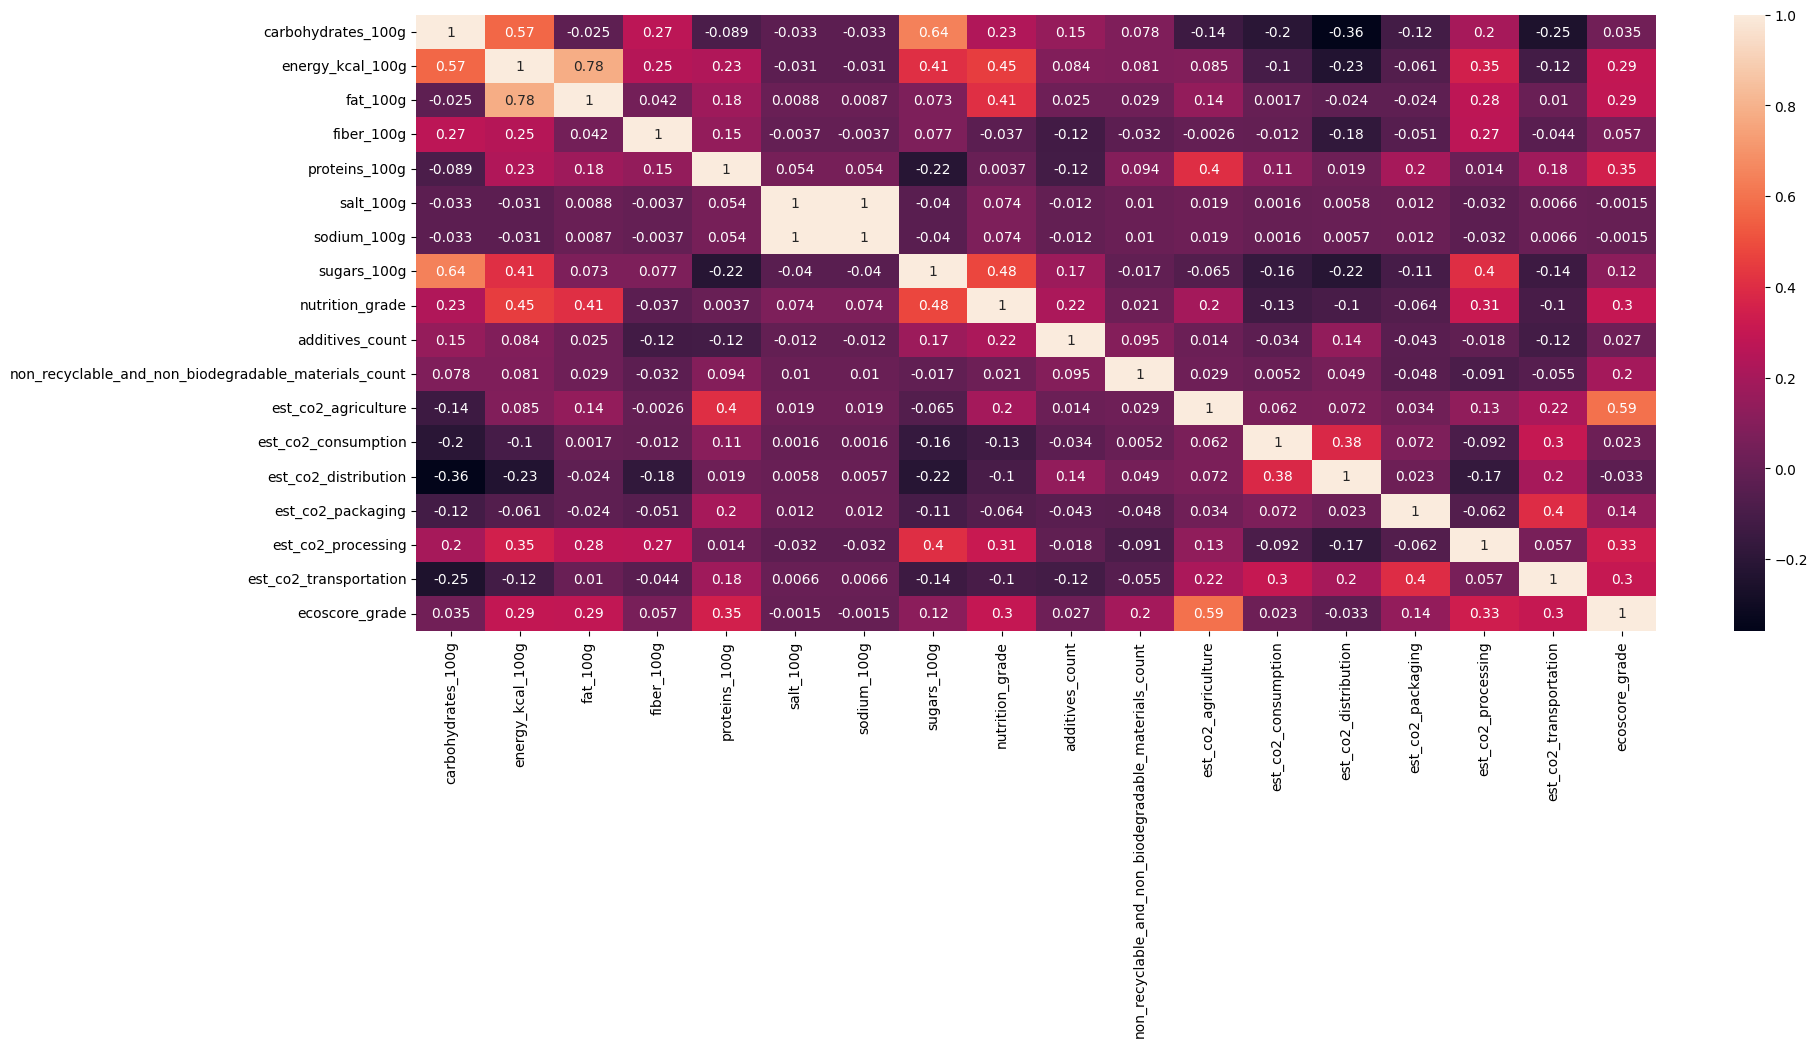

In [21]:
corr = numerical_v.corr()

# Create the heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(corr, annot=True)
plt.show()

Let us drop non important variables.

In [22]:
numerical_v = numerical_v.drop(['carbohydrates_100g','fiber_100g','salt_100g','sugars_100g','sodium_100g','additives_count','est_co2_consumption','est_co2_distribution'],axis=1)

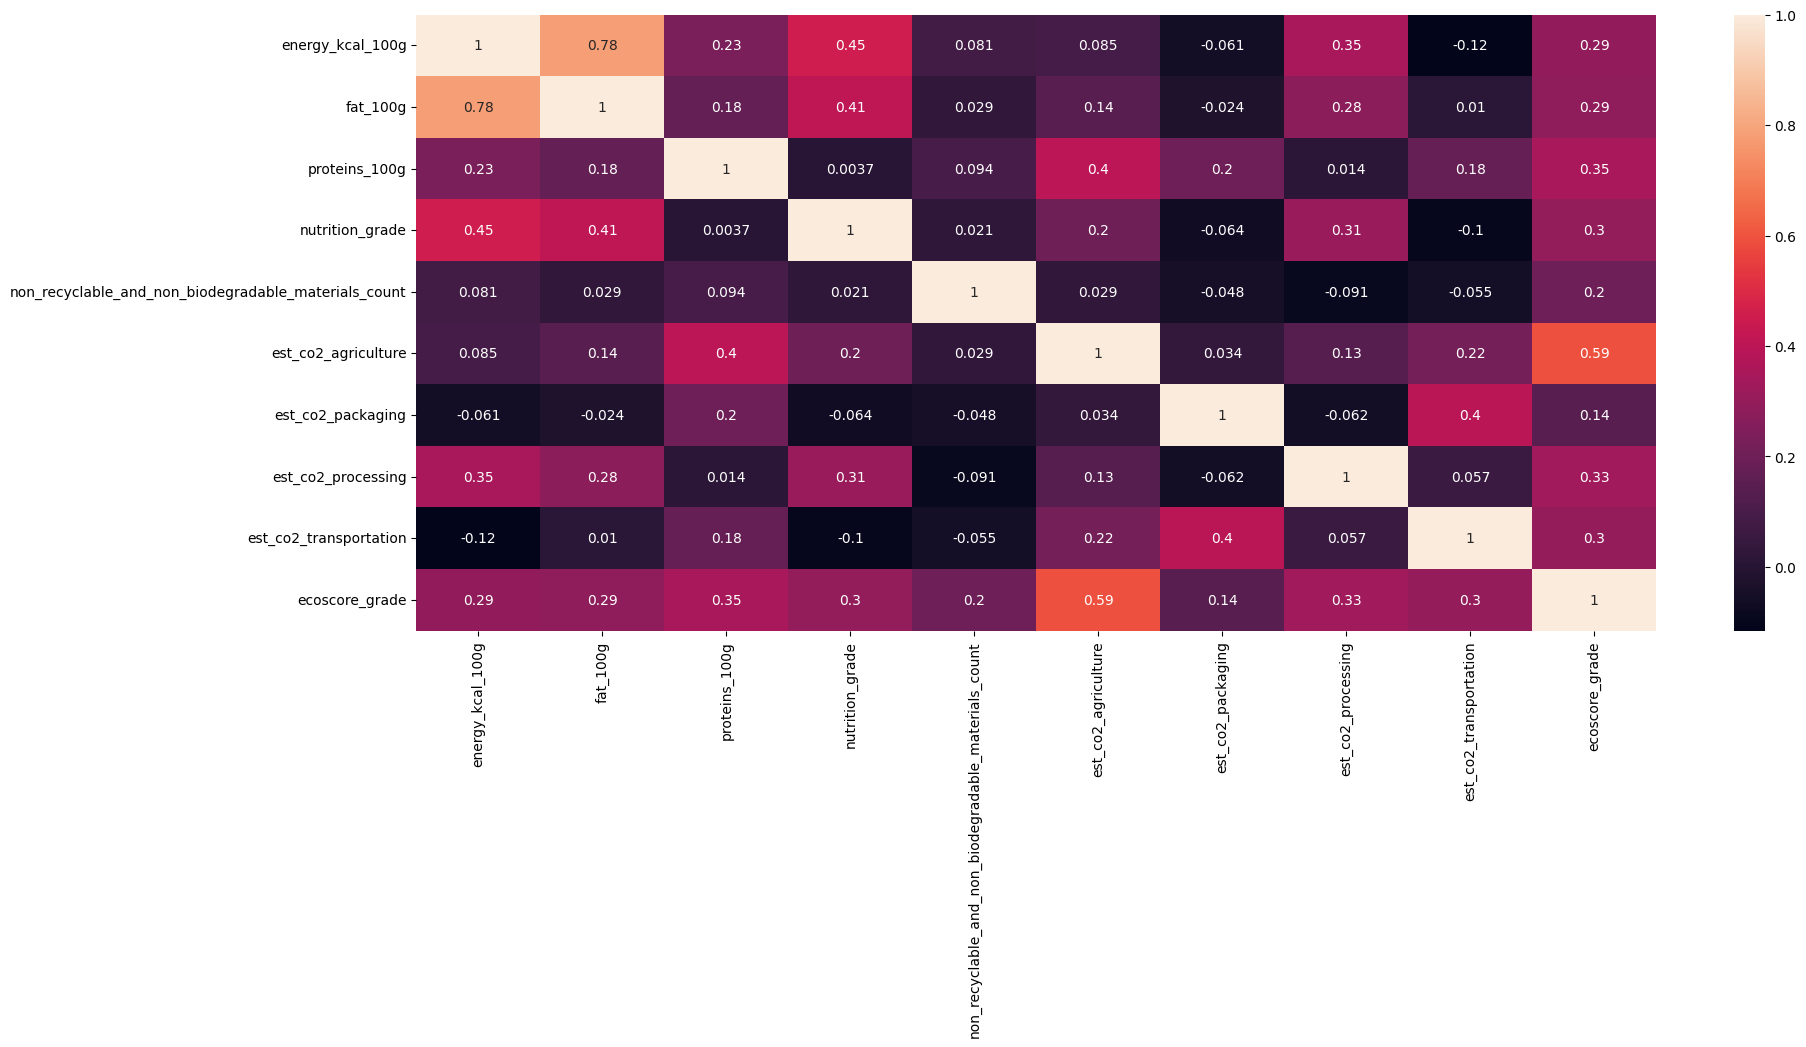

In [23]:
corr = numerical_v.corr()

# Create the heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(corr, annot=True)
plt.show()

## Version 1. F-1 Accuracy, 80%
Using XGboost.


In [24]:
features = numerical_v.iloc[:,:-1]
targets = numerical_v.iloc[:,-1:]

In [25]:
targets

,ecoscore_grade
2,3.0
4,4.0
5,3.0
6,3.0
8,1.0
...,...
20817,2.0
20826,2.0
20828,2.0
20829,4.0


In [26]:
train_features, test_features, train_targets, test_targets = train_test_split(features, targets,
                                                    stratify=targets,
                                                    test_size=0.10,random_state=49)

In [27]:
print("Number of training samples:", len(train_features))
print("Number of test samples:", len(test_features))

Number of training samples: 8475
Number of test samples: 942


In [28]:
model = xgb.XGBClassifier(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='binary:logistic',
                       max_depth=5,
                       learning_rate=0.01)

In [29]:
mean = np.mean(train_features, axis=0)
test_features -= mean
train_features -= mean
std = np.std(train_features, axis=0)
test_features /= std
train_features /= std

In [30]:
model.fit(train_features, train_targets,
        eval_set=[(train_features, train_targets), (test_features, test_targets)],
        verbose=50)

[0]	validation_0-mlogloss:1.59643	validation_1-mlogloss:1.59716
[50]	validation_0-mlogloss:1.16441	validation_1-mlogloss:1.18790
[100]	validation_0-mlogloss:0.93947	validation_1-mlogloss:0.97720
[150]	validation_0-mlogloss:0.80326	validation_1-mlogloss:0.85283
[200]	validation_0-mlogloss:0.71063	validation_1-mlogloss:0.76891
[250]	validation_0-mlogloss:0.64961	validation_1-mlogloss:0.71514
[300]	validation_0-mlogloss:0.60417	validation_1-mlogloss:0.67789
[350]	validation_0-mlogloss:0.57184	validation_1-mlogloss:0.65166
[400]	validation_0-mlogloss:0.54627	validation_1-mlogloss:0.63091
[450]	validation_0-mlogloss:0.52714	validation_1-mlogloss:0.61689
[500]	validation_0-mlogloss:0.51284	validation_1-mlogloss:0.60741
[550]	validation_0-mlogloss:0.50005	validation_1-mlogloss:0.59923
[600]	validation_0-mlogloss:0.48803	validation_1-mlogloss:0.59313
[650]	validation_0-mlogloss:0.47737	validation_1-mlogloss:0.58828
[700]	validation_0-mlogloss:0.46784	validation_1-mlogloss:0.58396
[750]	validat

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=50,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [31]:
test_predicted = model.predict(test_features)
res = classification_report(test_targets, test_predicted)
print(res)

              precision    recall  f1-score   support

         0.0       0.72      0.83      0.77        92
         1.0       0.85      0.86      0.85       309
         2.0       0.68      0.58      0.63       175
         3.0       0.74      0.77      0.75       251
         4.0       0.79      0.77      0.78       115

    accuracy                           0.77       942
   macro avg       0.75      0.76      0.76       942
weighted avg       0.77      0.77      0.77       942



## Base xgboost


In [32]:
model = xgb.XGBClassifier()
model.fit(train_features, train_targets)
test_predicted = model.predict(test_features)
res = classification_report(test_targets, test_predicted)
print(res)

              precision    recall  f1-score   support

         0.0       0.74      0.73      0.73        92
         1.0       0.83      0.87      0.85       309
         2.0       0.67      0.61      0.64       175
         3.0       0.74      0.75      0.75       251
         4.0       0.79      0.77      0.78       115

    accuracy                           0.77       942
   macro avg       0.75      0.75      0.75       942
weighted avg       0.76      0.77      0.76       942



## Tree classifier

In [33]:
# Create a decision tree classifier
classifier = DecisionTreeClassifier()

# Train the classifier
classifier.fit(train_features, train_targets)

# Make predictions on the test set
y_pred = classifier.predict(test_features)

res = classification_report(test_targets, y_pred)
print(res)




              precision    recall  f1-score   support

         0.0       0.68      0.71      0.70        92
         1.0       0.83      0.83      0.83       309
         2.0       0.61      0.61      0.61       175
         3.0       0.72      0.71      0.71       251
         4.0       0.72      0.74      0.73       115

    accuracy                           0.73       942
   macro avg       0.71      0.72      0.72       942
weighted avg       0.73      0.73      0.73       942



## Logisitic regression


In [34]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(train_features,train_targets)
predictions = logmodel.predict(test_features)
res = classification_report(test_targets, predictions)
print(res)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         0.0       0.54      0.73      0.62        92
         1.0       0.72      0.83      0.77       309
         2.0       0.55      0.30      0.39       175
         3.0       0.63      0.76      0.69       251
         4.0       0.82      0.47      0.60       115

    accuracy                           0.66       942
   macro avg       0.65      0.62      0.61       942
weighted avg       0.66      0.66      0.64       942



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Random forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

# Train the classifier
classifier.fit(train_features, train_targets)

# Make predictions on the test set
test_predicted = classifier.predict(test_features)
res = classification_report(test_targets, test_predicted)
print(res)

<ipython-input-35-e4a870774a28>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(train_features, train_targets)


              precision    recall  f1-score   support

         0.0       0.72      0.76      0.74        92
         1.0       0.84      0.85      0.85       309
         2.0       0.71      0.65      0.67       175
         3.0       0.76      0.77      0.77       251
         4.0       0.76      0.79      0.78       115

    accuracy                           0.78       942
   macro avg       0.76      0.76      0.76       942
weighted avg       0.77      0.78      0.78       942



In [36]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(train_features,train_targets)
#
# Predict for test set
#
y_pred = GNB.predict(test_features)
print(classification_report(test_targets,y_pred))

              precision    recall  f1-score   support

         0.0       0.44      0.99      0.61        92
         1.0       0.67      0.72      0.70       309
         2.0       0.34      0.41      0.37       175
         3.0       0.59      0.29      0.39       251
         4.0       0.77      0.44      0.56       115

    accuracy                           0.54       942
   macro avg       0.56      0.57      0.53       942
weighted avg       0.58      0.54      0.53       942



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Version 2, Accuracy 81%
Dropping the 'additives count' variable, it has low correlation with ecoscore_grade. Probably adding some noise.

In [38]:
from sklearn.preprocessing import MultiLabelBinarizer

In [39]:
mlb = MultiLabelBinarizer()

# Fit and transform the column with lists
encoded_data = mlb.fit_transform(data_train['packaging_materials'])

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_data, columns=mlb.classes_)

In [40]:
encoded_df

,"de:PP - Polypropylen,05",en:22,en:40,en:90,en:baking-paper,en:brown-glass,en:cardboard,en:clear-glass,en:composite-material,en:cork,...,xx:81-c-ldpe,xx:81-c-opp,xx:81-c-pap,xx:81-c-pet,xx:81-c-petmet,xx:82-c-pap,xx:84-c-pap,xx:90-c-ldpe,xx:90-c-pp,xx:91-c-fe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
numerical_v1 = data_train[['non_recyclable_and_non_biodegradable_materials_count','est_co2_agriculture', 'est_co2_consumption', 'est_co2_distribution','est_co2_packaging', 'est_co2_processing', 'est_co2_transportation','ecoscore_grade']]

In [43]:
numerical_v1

,non_recyclable_and_non_biodegradable_materials_count,est_co2_agriculture,est_co2_consumption,est_co2_distribution,est_co2_packaging,est_co2_processing,est_co2_transportation,ecoscore_grade
0,1,1.405794,0.122097,0.151978,0.400866,0.1234,0.344651,2
1,1,1.772009,0,0.019531,0.288156,5.215055,0.171567,3
2,1,2.2396,0,0.019531,0.281596,0.770511,0.252874,3
3,1,4.536405,0.006688,0.037393,0.185784,0.458632,0.217118,3
4,0,7.918371,0,0.015709,0.47839,0.445327,0.334988,4
...,...,...,...,...,...,...,...,...
20830,1,0.124785,0,0.015377,0.100104,0.116079,0.14558,1
20831,1,19.495674,0,0.015709,0.100104,6.998544,0.456216,4
20832,1,1.463891,0,0.017321,0.104294,15.259235,0.265547,4
20833,1,7.304731,0.006688,0.039033,0.180553,0.05647,0.233556,3


In [61]:
numerical_v1.isna().sum()

non_recyclable_and_non_biodegradable_materials_count    0
est_co2_agriculture                                     0
est_co2_consumption                                     0
est_co2_distribution                                    0
est_co2_packaging                                       0
est_co2_processing                                      0
est_co2_transportation                                  0
ecoscore_grade                                          0
dtype: int64

In [45]:
for column in numerical_v1.columns:
  numerical_v1[column] = numerical_v1[column].astype(float)

<ipython-input-45-2a5ea8367494>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_v1[column] = numerical_v1[column].astype(float)


In [46]:
features = numerical_v1.iloc[:,:-1]
targets = numerical_v1.iloc[:,-1:]


In [47]:
train_features, test_features, train_targets, test_targets = train_test_split(features, targets,
                                                    stratify=targets,
                                                    test_size=0.20,random_state=49)
model.fit(train_features, train_targets,
        eval_set=[(train_features, train_targets), (test_features, test_targets)],
        verbose=50)

test_predicted = model.predict(test_features)
res = classification_report(test_targets, test_predicted)
print(res)

[0]	validation_0-mlogloss:1.21499	validation_1-mlogloss:1.21926
[50]	validation_0-mlogloss:0.37526	validation_1-mlogloss:0.41743
[99]	validation_0-mlogloss:0.35531	validation_1-mlogloss:0.41649
              precision    recall  f1-score   support

         0.0       0.80      0.89      0.85       304
         1.0       0.93      0.87      0.90      1284
         2.0       0.74      0.66      0.70       714
         3.0       0.79      0.84      0.81      1218
         4.0       0.82      0.86      0.84       647

    accuracy                           0.83      4167
   macro avg       0.82      0.83      0.82      4167
weighted avg       0.83      0.83      0.83      4167



In [48]:
df_encoded = pd.concat([numerical_v1, encoded_df], axis=1)

# Remove the original 'categories' column if desired
df_encoded.drop('ecoscore_grade', axis=1, inplace=True)


In [49]:
df_encoded['ecoscore_grade'] = data_train['ecoscore_grade']

In [50]:
features = df_encoded.iloc[:,:-1]
targets = df_encoded.iloc[:,-1:]

In [51]:
unknown_counts = features.isin(['unknown']).sum()

# Print the counts of 'unknown' values
print(unknown_counts.sum())

0


In [52]:
targets = targets.astype('int')

In [53]:
df_encoded['ecoscore_grade'] = df_encoded['ecoscore_grade'].astype(int)

<Axes: >

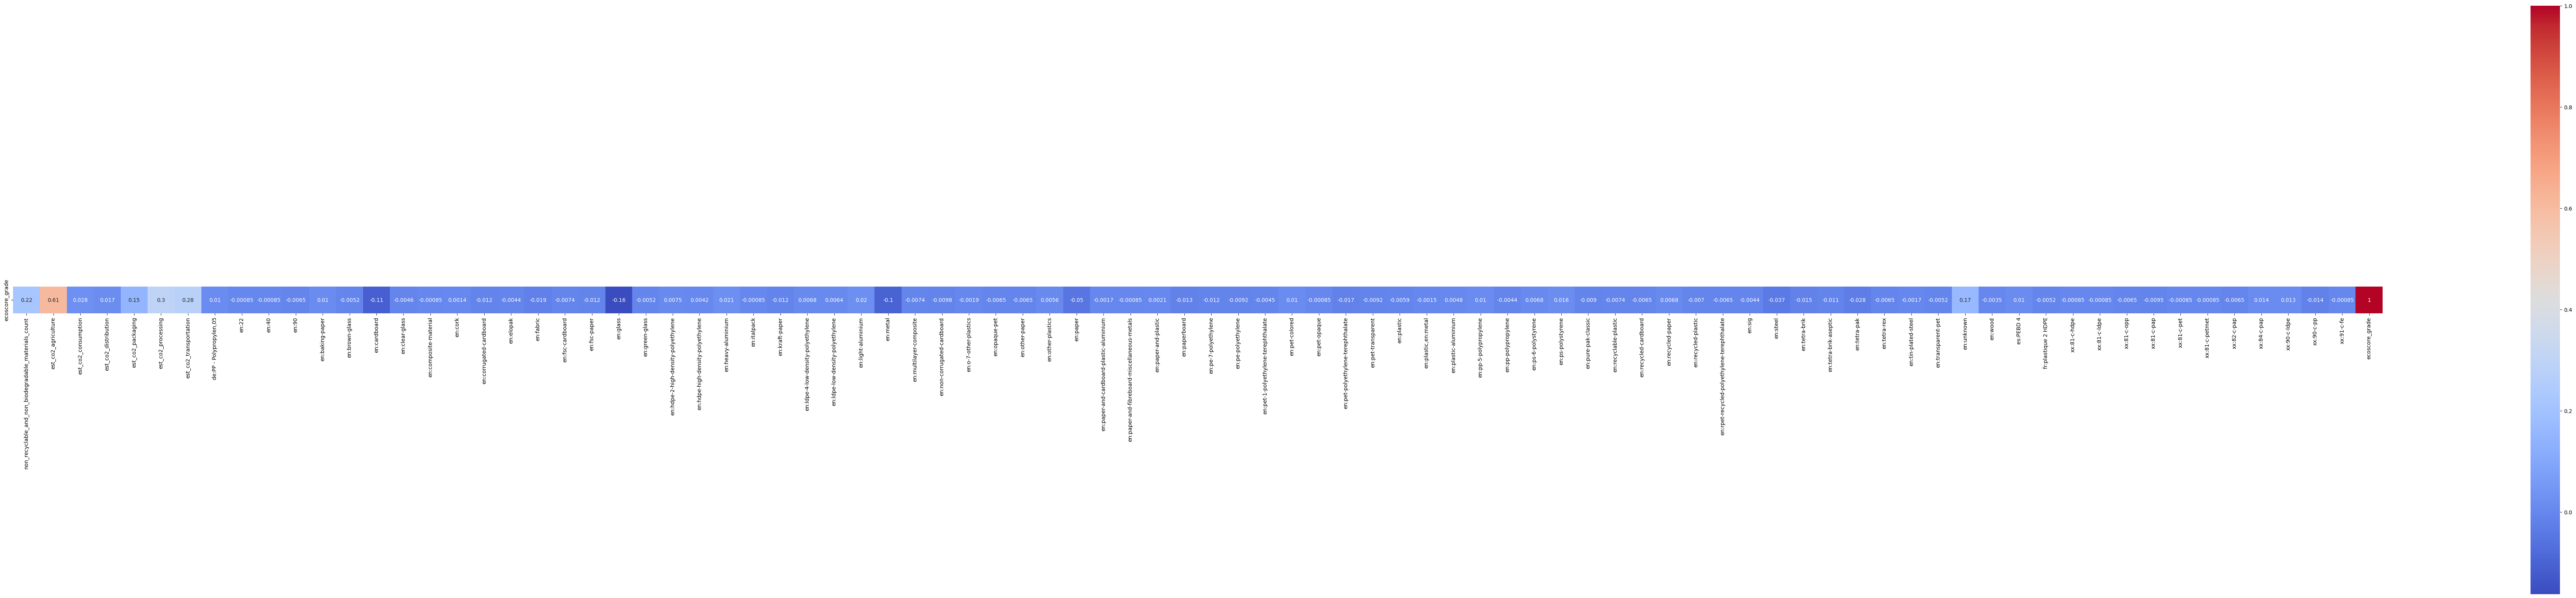

In [54]:
corr = df_encoded.corr()
matrix = corr['ecoscore_grade']
plt.figure(figsize=(100, 20))
sns.heatmap(matrix.to_frame().T, annot=True, cmap="coolwarm", square=True)


In [60]:
train_features, test_features, train_targets, test_targets = train_test_split(features, targets,
                                                    stratify=targets,
                                                    test_size=0.20,random_state=49)
classifier = RandomForestClassifier(n_estimators=100)

# Train the classifier
classifier.fit(train_features, train_targets)

# Make predictions on the test set
test_predicted = classifier.predict(test_features)
res = classification_report(test_targets, test_predicted)
print(res)

<ipython-input-60-533872016435>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(train_features, train_targets)


              precision    recall  f1-score   support

           0       0.87      0.88      0.88       304
           1       0.92      0.92      0.92      1284
           2       0.78      0.73      0.75       714
           3       0.84      0.86      0.85      1218
           4       0.86      0.89      0.88       647

    accuracy                           0.86      4167
   macro avg       0.85      0.86      0.85      4167
weighted avg       0.86      0.86      0.86      4167



In [56]:
classifier = xgb.XGBRFClassifier()

# Train the classifier
classifier.fit(train_features, train_targets)

# Make predictions on the test set
test_predicted = classifier.predict(test_features)
res = classification_report(test_targets, test_predicted)
print(res)

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       304
           1       0.84      0.90      0.87      1284
           2       0.74      0.44      0.55       714
           3       0.74      0.87      0.80      1218
           4       0.85      0.81      0.83       647

    accuracy                           0.79      4167
   macro avg       0.79      0.77      0.77      4167
weighted avg       0.79      0.79      0.78      4167



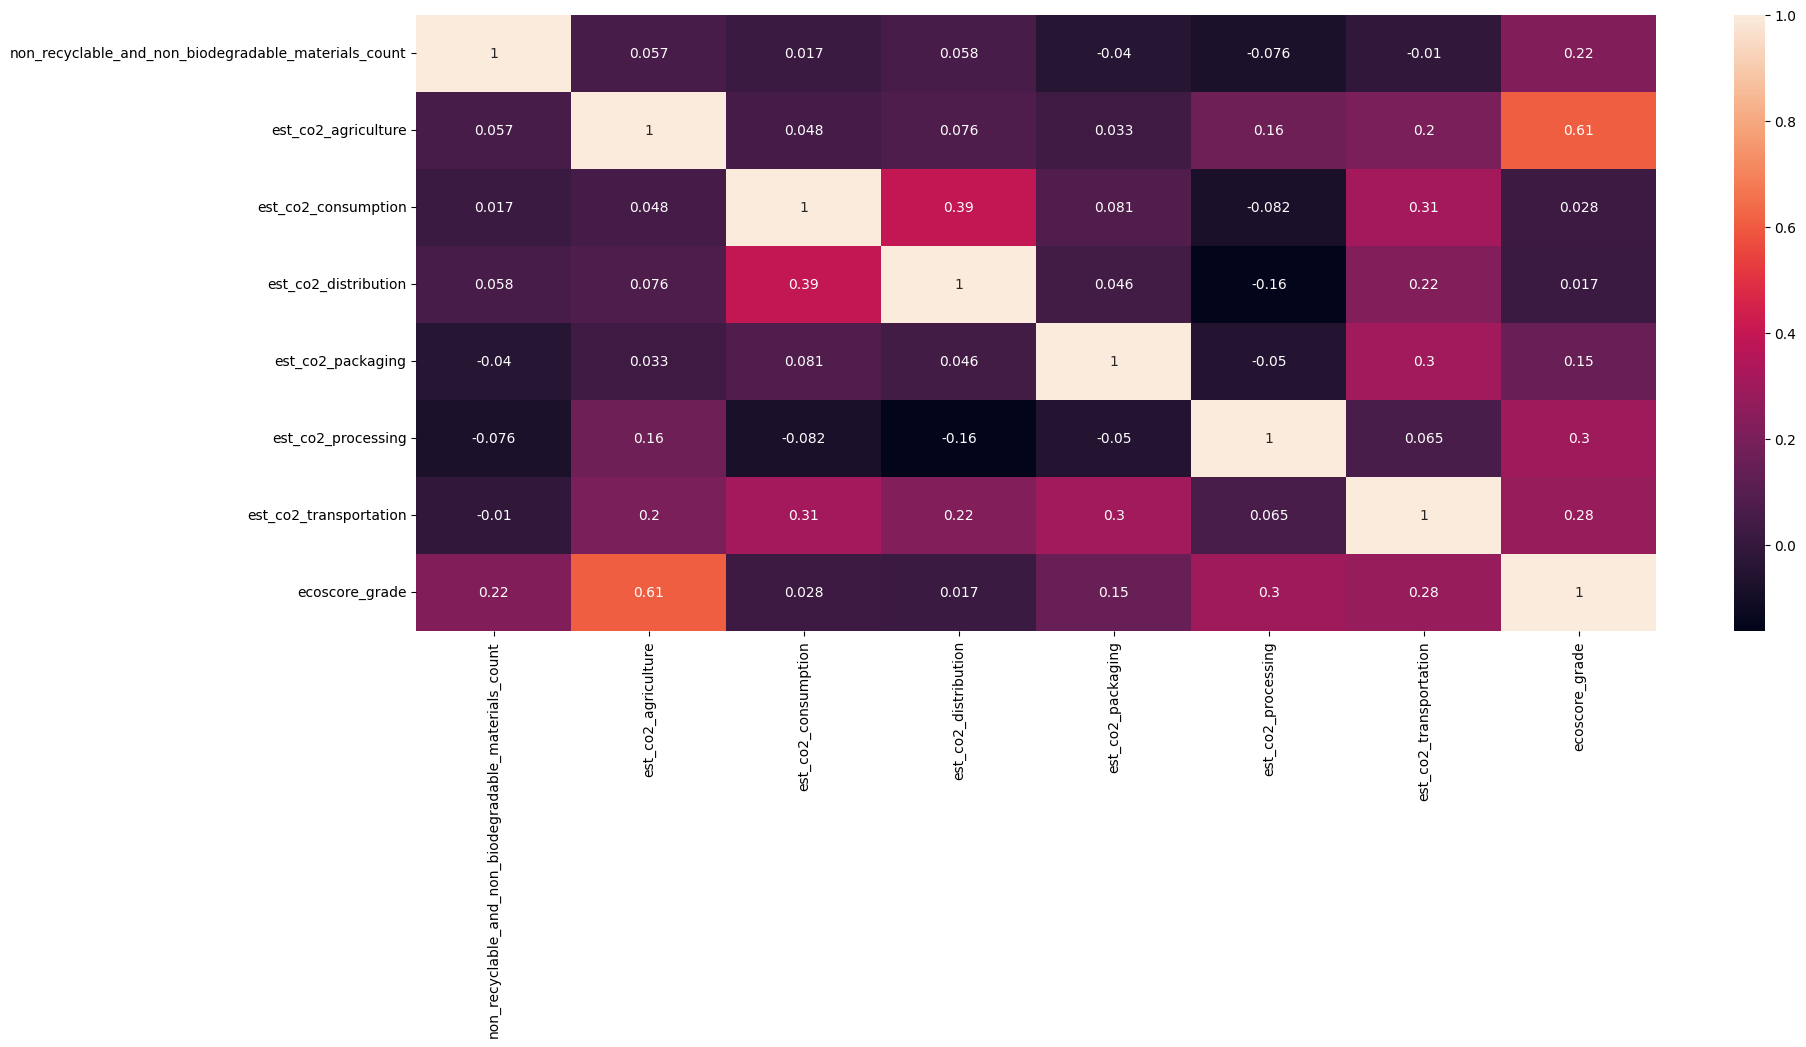

In [58]:
corr = numerical_v1.corr()

# Create the heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(corr, annot=True)
plt.show()

## Data test.

In [ ]:
data_test = pd.read_json('/content/test_products.json')

In [ ]:
data_test = data_test.T

In [ ]:
data_test